<a href="https://colab.research.google.com/github/malh718/datasci_3_eda/blob/main/HHA507HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore

from scipy.stats import pearsonr


import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro



df = pd.read_csv('Birth_Stat.csv')
df


,OBJECTID,ZIP,LBW,Preterm,TeenBirth,Birth_Rate,F1stTriCare,SHAPE_Length,SHAPE_Area
0,1,60002,0.084837,0.134124,18.5,10.440239,74.639700,215525.155184,-1.149062e+09
1,2,60010,0.052208,0.080828,1.4,3.219561,86.189946,178637.109618,-8.027354e+08
2,3,60015,0.095519,0.101959,1.8,7.635261,83.544132,111400.890558,-3.674576e+08
3,4,60020,0.077067,0.087777,29.9,13.737068,79.075398,92363.084625,-1.666177e+08
4,5,60030,0.071311,0.086675,6.2,10.598146,81.745316,247258.224672,-8.455179e+08
5,6,60031,0.081407,0.098994,10.1,10.265032,78.372131,163995.181561,-5.271176e+08
6,7,60035,0.067941,0.088888,3.6,8.161008,84.821850,115796.723820,-3.457929e+08
7,8,60040,0.081060,0.116597,21.7,14.259259,81.801379,25907.372467,-1.780943e+07
8,9,60042,0.057217,0.103992,5.2,5.142590,74.762789,45385.395226,-4.517757e+07
9,10,60044,0.045741,0.077593,4.8,8.494268,84.421498,92539.708731,-2.127777e+08


In [ ]:
df.sample(10)


,OBJECTID,ZIP,LBW,Preterm,TeenBirth,Birth_Rate,F1stTriCare,SHAPE_Length,SHAPE_Area
5,6,60031,0.081407,0.098994,10.1,10.265032,78.372131,163995.181561,-5.271176e+08
25,26,60099,0.091062,0.082217,35.1,13.486458,61.009191,188925.390246,-6.262642e+08
6,7,60035,0.067941,0.088888,3.6,8.161008,84.821850,115796.723820,-3.457929e+08
18,19,60073,0.064898,0.092917,42.9,17.024766,74.793289,209118.936758,-5.196587e+08
16,17,60064,0.080330,0.085871,48.3,15.457919,59.121392,90452.895586,-1.399011e+08
8,9,60042,0.057217,0.103992,5.2,5.142590,74.762789,45385.395226,-4.517757e+07
15,16,60061,0.092853,0.110230,8.1,10.824663,82.128983,102713.138127,-2.574212e+08
1,2,60010,0.052208,0.080828,1.4,3.219561,86.189946,178637.109618,-8.027354e+08
26,27,60041,0.044966,0.109026,12.3,11.987291,72.736204,152724.616883,-3.919550e+08
2,3,60015,0.095519,0.101959,1.8,7.635261,83.544132,111400.890558,-3.674576e+08


In [ ]:
df['OBJECTID'].nunique()

27

In [ ]:
df.columns


Index(['OBJECTID', 'ZIP', 'LBW', 'Preterm', 'TeenBirth', 'Birth_Rate',
       'F1stTriCare', 'SHAPE_Length', 'SHAPE_Area'],
      dtype='object')

Univariate Analysis

In [ ]:
df.dtypes

OBJECTID          int64
ZIP               int64
LBW             float64
Preterm         float64
TeenBirth       float64
Birth_Rate      float64
F1stTriCare     float64
SHAPE_Length    float64
SHAPE_Area      float64
dtype: object

In [ ]:
df.OBJECTID.describe()

count    27.000000
mean     14.000000
std       7.937254
min       1.000000
25%       7.500000
50%      14.000000
75%      20.500000
max      27.000000
Name: OBJECTID, dtype: float64

In [ ]:
df.OBJECTID.mode()

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
Name: OBJECTID, dtype: int64

In [ ]:
df.OBJECTID.median()

14.0

In [ ]:
df.ZIP.describe()

count       27.000000
mean     60053.555556
std         27.169459
min      60002.000000
25%      60037.500000
50%      60047.000000
75%      60078.000000
max      60099.000000
Name: ZIP, dtype: float64

In [ ]:
df.ZIP.mode()


0     60002
1     60010
2     60015
3     60020
4     60030
5     60031
6     60035
7     60040
8     60041
9     60042
10    60044
11    60045
12    60046
13    60047
14    60048
15    60060
16    60061
17    60064
18    60069
19    60073
20    60083
21    60084
22    60085
23    60087
24    60089
25    60096
26    60099
Name: ZIP, dtype: int64

In [ ]:
df.ZIP.median()

60047.0

In [ ]:
df.LBW.describe()

count    27.000000
mean      0.071545
std       0.015157
min       0.044966
25%       0.061194
50%       0.073594
75%       0.081603
max       0.095519
Name: LBW, dtype: float64

In [ ]:
df.LBW.mode()


0     0.044966
1     0.045741
2     0.047032
3     0.048820
4     0.052208
5     0.057217
6     0.057701
7     0.064688
8     0.064898
9     0.067941
10    0.068126
11    0.071311
12    0.071366
13    0.073594
14    0.076836
15    0.077067
16    0.077744
17    0.080330
18    0.081060
19    0.081407
20    0.081799
21    0.084837
22    0.085447
23    0.090144
24    0.091062
25    0.092853
26    0.095519
Name: LBW, dtype: float64

In [ ]:
df.LBW.median()

0.073593986

In [ ]:
df.Preterm.describe()


count    27.000000
mean      0.093676
std       0.015107
min       0.063301
25%       0.083839
50%       0.089882
75%       0.101870
max       0.134124
Name: Preterm, dtype: float64

In [ ]:
df.Preterm.mode()


0     0.063301
1     0.076689
2     0.077593
3     0.077707
4     0.080828
5     0.081997
6     0.082217
7     0.085460
8     0.085630
9     0.085871
10    0.086675
11    0.087777
12    0.088888
13    0.089882
14    0.092917
15    0.096260
16    0.098070
17    0.098994
18    0.099674
19    0.101782
20    0.101959
21    0.103992
22    0.109026
23    0.110230
24    0.115101
25    0.116597
26    0.134124
Name: Preterm, dtype: float64

In [ ]:
df.Preterm.median()

0.089881576

In [ ]:
df.Birth_Rate.describe()


count    27.000000
mean     10.309527
std       3.991030
min       3.219561
25%       7.688832
50%      10.265032
75%      13.611763
max      18.080633
Name: Birth_Rate, dtype: float64

In [ ]:
df.Birth_Rate.mode()


0      3.219561
1      4.886430
2      5.142590
3      5.164246
4      5.300566
5      6.855279
6      7.635261
7      7.742402
8      7.827858
9      8.161008
10     8.494268
11     9.439414
12    10.183884
13    10.265032
14    10.440239
15    10.598146
16    10.824663
17    11.987291
18    13.367328
19    13.486458
20    13.737068
21    13.912523
22    14.259259
23    14.863123
24    15.457919
25    17.024766
26    18.080633
Name: Birth_Rate, dtype: float64

In [ ]:
df.Birth_Rate.median()

10.2650316456

In [ ]:
df.F1stTriCare.describe()


count    27.000000
mean     77.799129
std       7.559256
min      59.121392
25%      74.701244
50%      80.726607
75%      83.514543
max      86.189946
Name: F1stTriCare, dtype: float64

In [ ]:
df.F1stTriCare.mode()


0     59.121392
1     61.009191
2     64.381570
3     67.712427
4     70.191001
5     72.736204
6     74.639700
7     74.762789
8     74.793289
9     78.087837
10    78.372131
11    79.075398
12    79.698112
13    80.726607
14    80.923184
15    81.745316
16    81.801379
17    82.128983
18    82.899794
19    83.484953
20    83.544132
21    84.344978
22    84.390634
23    84.421498
24    84.572198
25    84.821850
26    86.189946
Name: F1stTriCare, dtype: float64

In [ ]:
df.F1stTriCare.median()

In [ ]:
df.SHAPE_Length.describe()


count        27.000000
mean     146386.746889
std       54274.898427
min       25907.372467
25%      107057.014342
50%      161457.245301
75%      179404.536027
max      247258.224672
Name: SHAPE_Length, dtype: float64

In [ ]:
df.SHAPE_Length.mode()


0      25907.372467
1      45385.395226
2      62444.471661
3      90452.895586
4      92363.084625
5      92539.708731
6     102713.138127
7     111400.890558
8     115796.723820
9     137038.947754
10    146555.427438
11    152724.616883
12    159182.367883
13    161457.245301
14    163122.611793
15    163995.181561
16    164174.744392
17    164753.217612
18    176981.859420
19    178637.109618
20    180171.962436
21    188925.390246
22    196071.573674
23    207743.912574
24    209118.936758
25    215525.155184
26    247258.224672
Name: SHAPE_Length, dtype: float64

In [ ]:
df.SHAPE_Length.median()

In [ ]:
df.SHAPE_Area.describe()


count    2.700000e+01
mean    -4.695389e+08
std      2.938934e+08
min     -1.149062e+09
25%     -6.772510e+08
50%     -3.919550e+08
75%     -2.202751e+08
max     -1.780943e+07
Name: SHAPE_Area, dtype: float64

In [ ]:
df.SHAPE_Area.mode()


0    -1.149062e+09
1    -9.193818e+08
2    -8.455179e+08
3    -8.190083e+08
4    -8.027354e+08
5    -7.304244e+08
6    -7.282379e+08
7    -6.262642e+08
8    -6.214754e+08
9    -6.175913e+08
10   -5.271176e+08
11   -5.196587e+08
12   -5.051635e+08
13   -3.919550e+08
14   -3.919074e+08
15   -3.898800e+08
16   -3.674576e+08
17   -3.457929e+08
18   -2.574212e+08
19   -2.277724e+08
20   -2.127777e+08
21   -1.700669e+08
22   -1.666177e+08
23   -1.413737e+08
24   -1.399011e+08
25   -4.517757e+07
26   -1.780943e+07
Name: SHAPE_Area, dtype: float64

In [ ]:
df.SHAPE_Area.median()

-391955019.532177

In [ ]:
temp = df.groupby('Preterm').ZIP.describe()
temp.to_csv('tb.csv')


Visualising Preterm Births using Historgram

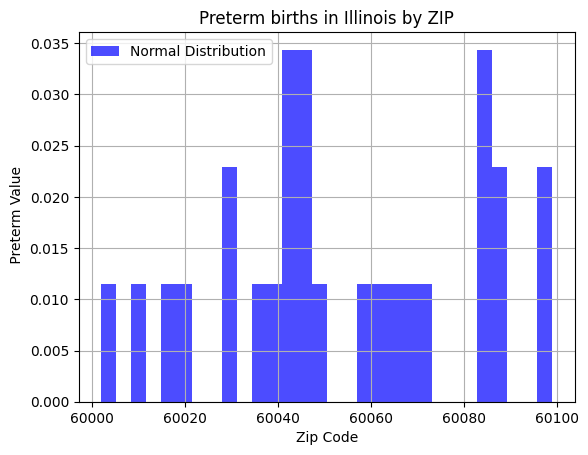

In [ ]:
plt.hist(df['ZIP'], bins=30, density=True, alpha=0.7, color='blue', label='Normal Distribution')
plt.title('Preterm births in Illinois by ZIP')
plt.xlabel('Zip Code')
plt.ylabel(' Preterm Value')
plt.legend()
plt.grid(True)
plt.show()


Bivariate Analysis

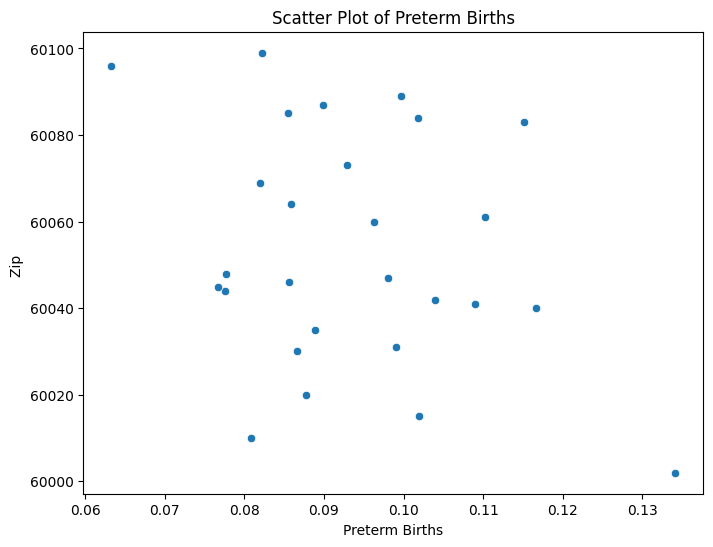

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=(df['Preterm']), y=(df['ZIP']))
plt.xlabel("Preterm Births")
plt.ylabel("Zip ")
plt.title("Scatter Plot of Preterm Births")
plt.show()

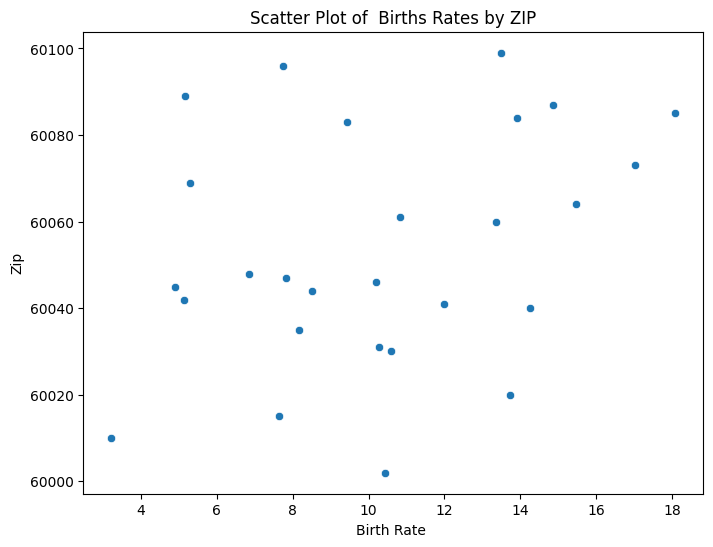

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=(df['Birth_Rate']), y=(df['ZIP']))
plt.xlabel("Birth Rate ")
plt.ylabel("Zip")
plt.title("Scatter Plot of  Births Rates by ZIP")
plt.show()


Correlation Coefficients

In [ ]:

pearson_corr, p_value = pearsonr(df["Preterm"], df["ZIP"])

print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: -0.28
P-value: 0.1616


In [ ]:

pearson_corr, p_value = pearsonr(df["ZIP"], df["Birth_Rate"])

print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")
print(f"P-value: {p_value:.4f}")


Pearson Correlation Coefficient: 0.31
P-value: 0.1157


In [ ]:
upper_array= (np.where((df['Preterm']<0.12) & (df['Birth_Rate']<16)))
lower_array= (np.where((df['Preterm']<0.12) & (df['Birth_Rate']<16)))



In [90]:
df.Preterm.describe()

count    27.000000
mean      0.093676
std       0.015107
min       0.063301
25%       0.083839
50%       0.089882
75%       0.101870
max       0.134124
Name: Preterm, dtype: float64

<Axes: >

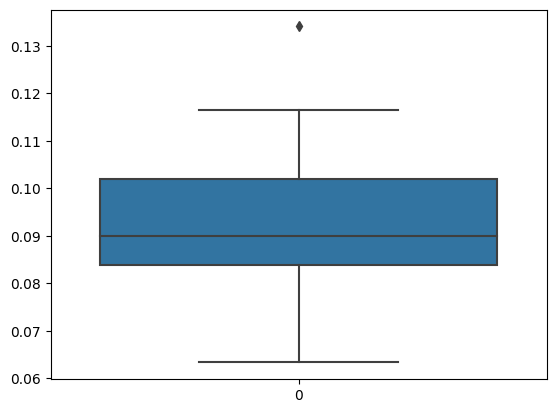

In [91]:
sns.boxplot(data = df['Preterm'])

Handling Outliers

In [93]:
percentile25 = df['Preterm'].quantile(0.25)
percentile75 = df['Preterm'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)


75th quartile:  0.101870484
25th quartile:  0.083838721


In [94]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)


IQR:  0.018031762999999992


In [98]:
df_f = df[~((df.Preterm<(percentile25-1.5*iqr)) | (df.Preterm>(percentile75+1.5*iqr)))]
df_f

,OBJECTID,ZIP,LBW,Preterm,TeenBirth,Birth_Rate,F1stTriCare,SHAPE_Length,SHAPE_Area,Z-score
1,2,60010,0.052208,0.080828,1.4,3.219561,86.189946,178637.109618,-8.027354e+08,-1.810316
2,3,60015,0.095519,0.101959,1.8,7.635261,83.544132,111400.890558,-3.674576e+08,-0.682833
3,4,60020,0.077067,0.087777,29.9,13.737068,79.075398,92363.084625,-1.666177e+08,0.875171
4,5,60030,0.071311,0.086675,6.2,10.598146,81.745316,247258.224672,-8.455179e+08,0.073695
5,6,60031,0.081407,0.098994,10.1,10.265032,78.372131,163995.181561,-5.271176e+08,-0.011361
6,7,60035,0.067941,0.088888,3.6,8.161008,84.821850,115796.723820,-3.457929e+08,-0.548592
7,8,60040,0.081060,0.116597,21.7,14.259259,81.801379,25907.372467,-1.780943e+07,1.008505
8,9,60042,0.057217,0.103992,5.2,5.142590,74.762789,45385.395226,-4.517757e+07,-1.319299
9,10,60044,0.045741,0.077593,4.8,8.494268,84.421498,92539.708731,-2.127777e+08,-0.463499
10,11,60045,0.048820,0.076689,0.3,4.886430,84.572198,161457.245301,-6.214754e+08,-1.384706


In [95]:
Q1 = df.Preterm.quantile(0.25)
Q3 = df.Preterm.quantile(0.75)
IQR = Q3-Q1
df_final = df[~((df.Preterm<(Q1-1.5*IQR)) | (df.Preterm>(Q3+1.5*IQR)))]
df_final

,OBJECTID,ZIP,LBW,Preterm,TeenBirth,Birth_Rate,F1stTriCare,SHAPE_Length,SHAPE_Area,Z-score
1,2,60010,0.052208,0.080828,1.4,3.219561,86.189946,178637.109618,-8.027354e+08,-1.810316
2,3,60015,0.095519,0.101959,1.8,7.635261,83.544132,111400.890558,-3.674576e+08,-0.682833
3,4,60020,0.077067,0.087777,29.9,13.737068,79.075398,92363.084625,-1.666177e+08,0.875171
4,5,60030,0.071311,0.086675,6.2,10.598146,81.745316,247258.224672,-8.455179e+08,0.073695
5,6,60031,0.081407,0.098994,10.1,10.265032,78.372131,163995.181561,-5.271176e+08,-0.011361
6,7,60035,0.067941,0.088888,3.6,8.161008,84.821850,115796.723820,-3.457929e+08,-0.548592
7,8,60040,0.081060,0.116597,21.7,14.259259,81.801379,25907.372467,-1.780943e+07,1.008505
8,9,60042,0.057217,0.103992,5.2,5.142590,74.762789,45385.395226,-4.517757e+07,-1.319299
9,10,60044,0.045741,0.077593,4.8,8.494268,84.421498,92539.708731,-2.127777e+08,-0.463499
10,11,60045,0.048820,0.076689,0.3,4.886430,84.572198,161457.245301,-6.214754e+08,-1.384706


In [ ]:
m = np.mean(df.Birth_Rate)
s = np.std(df.Birth_Rate)
df['Z-score'] = (df.Birth_Rate - m)/s
df_outlier = df[abs(df['Z-score']) >3]
df


,OBJECTID,ZIP,LBW,Preterm,TeenBirth,Birth_Rate,F1stTriCare,SHAPE_Length,SHAPE_Area,Z-score
0,1,60002,0.084837,0.134124,18.5,10.440239,74.639700,215525.155184,-1.149062e+09,0.033375
1,2,60010,0.052208,0.080828,1.4,3.219561,86.189946,178637.109618,-8.027354e+08,-1.810316
2,3,60015,0.095519,0.101959,1.8,7.635261,83.544132,111400.890558,-3.674576e+08,-0.682833
3,4,60020,0.077067,0.087777,29.9,13.737068,79.075398,92363.084625,-1.666177e+08,0.875171
4,5,60030,0.071311,0.086675,6.2,10.598146,81.745316,247258.224672,-8.455179e+08,0.073695
5,6,60031,0.081407,0.098994,10.1,10.265032,78.372131,163995.181561,-5.271176e+08,-0.011361
6,7,60035,0.067941,0.088888,3.6,8.161008,84.821850,115796.723820,-3.457929e+08,-0.548592
7,8,60040,0.081060,0.116597,21.7,14.259259,81.801379,25907.372467,-1.780943e+07,1.008505
8,9,60042,0.057217,0.103992,5.2,5.142590,74.762789,45385.395226,-4.517757e+07,-1.319299
9,10,60044,0.045741,0.077593,4.8,8.494268,84.421498,92539.708731,-2.127777e+08,-0.463499


Automated Analysis

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

data = pd.read_csv('Birth_Stat.csv')

report = ProfileReport(data)
report.to_file('eda_report.html')

<ipython-input-89-8fc7796b3cd9>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=121acd39690fbb0086caa23b1912df6f5002a278fb5cc0ff3f3556209f4cd112
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
